<a href="https://colab.research.google.com/github/sudeepmenon17/PytorchforNN/blob/main/features_contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import auth
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necessary for 3D plotting

In [11]:

#!ls /content/drive/MyDrive/


In [12]:

# Load data
df = pd.read_csv("/content/drive/MyDrive/NN_features_for_training/features_15.2.csv")

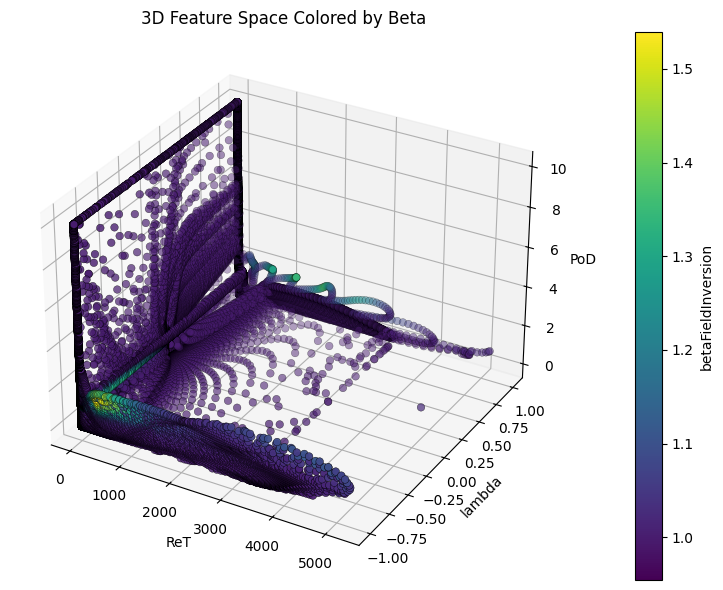

In [13]:
# Extract relevant features
x = df["ReT"]
y = df["lambda"]
z = df["PoD"]
c = df["betaFieldInversion"]

# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=c, cmap='viridis', s=30, edgecolor='k', linewidth=0.3)

# Labels
ax.set_xlabel("ReT")
ax.set_ylabel("lambda")
ax.set_zlabel("PoD")
ax.set_title("3D Feature Space Colored by Beta")

# Color bar
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label("betaFieldInversion")

plt.tight_layout()
plt.show()